#  <span style='color:midnightblue'>  Titanic Survival Prediction using Linear Models and Decision Trees </span>

##  <span style='color:royalblue'>  1. Load required libraries </span>

In [ ]:
install.packages("rpart.plot")

In [1]:
library(rpart.plot)

Loading required package: rpart


##  <span style='color:royalblue'>  2. Load dataset </span>

In [2]:
titanic_df <- read.csv("./titanic.csv", sep = ";")

##  <span style='color:royalblue'>  3. Inspect dataframe </span>

In [3]:
head(titanic_df,5)

ID,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,male,22,1,0,A/5 21171,7.2500,,S
2,1,1,female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,female,35,1,0,113803,53.1000,C123,S
5,0,3,male,35,0,0,373450,8.0500,,S


In [4]:
skimr::skim(titanic_df)

Warning message in sorted_count(x):
“Variable contains value(s) of "" that have been converted to "empty".”

── Data Summary ────────────────────────
                           Values    
Name                       titanic_df
Number of rows             891       
Number of columns          11        
_______________________              
Column type frequency:               
  factor                   4         
  numeric                  7         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 Sex                   0             1 FALSE          2
2 Ticket                0             1 FALSE        681
3 Cabin                 0             1 FALSE        148
4 Embarked              0             1 FALSE          4
  top_counts                       
1 "mal: 577, fem: 314"             
2 "160: 7, 347: 7, CA.: 7, 310: 6" 
3 "emp: 687, B96: 4, C23: 4, G6: 4"
4 "S: 644, C: 168, Q: 77, \": 2"   

── Variable type: numeric ─────

##  <span style='color:royalblue'>  4. Split Dataset into Train and Test </span>

In [5]:
titanic_df <- titanic_df[-which(is.na(titanic_df$Age)),]
train <- titanic_df[1:600,]
test <- titanic_df[601:714,]

##  <span style='color:royalblue'>  5. Fit and Summarize Linear Model </span>

In [7]:
model_sur <- glm(Survived ~ ., data = train[,-c(1,8,10)], family=binomial)

In [ ]:
stargazer::stargazer(model_sur, type = "html", report = "vc*", star.cutoffs = c(.05, .01, .001), out = "table3.html")

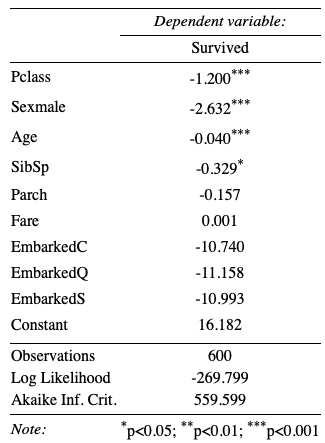

<span style='color:midnightblue'>  According to the linear model, the most relevant dependent variables are Pclass, Sexmale, Age and SibSp.

##  <span style='color:royalblue'>  6. Get Linear Model Accuracy </span>

In [8]:
prediction <- predict(model_sur, type='response', newdata = test[,-c(1,8,10)])
prediction <- ifelse(prediction > .5,1,0)
misClasificError <- mean(prediction != test$Survived)
print(1-misClasificError)

[1] 0.8157895


##  <span style='color:royalblue'>  7. Fit and Summarize Decision Tree </span>


Classification tree:
rpart::rpart(formula = Survived ~ ., data = train[, -c(1, 8, 
    10)], method = "class", control = rpart::rpart.control(minsplit = 20, 
    cp = 0.015))

Variables actually used in tree construction:
[1] Age    Fare   Pclass Sex    SibSp 

Root node error: 244/600 = 0.40667

n= 600 

        CP nsplit rel error  xerror     xstd
1 0.450820      0   1.00000 1.00000 0.049312
2 0.036885      1   0.54918 0.54918 0.041810
3 0.020492      2   0.51230 0.59016 0.042874
4 0.018443      3   0.49180 0.55738 0.042030
5 0.015369      5   0.45492 0.53279 0.041358
6 0.015000      9   0.39344 0.52049 0.041008


Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call prp with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”

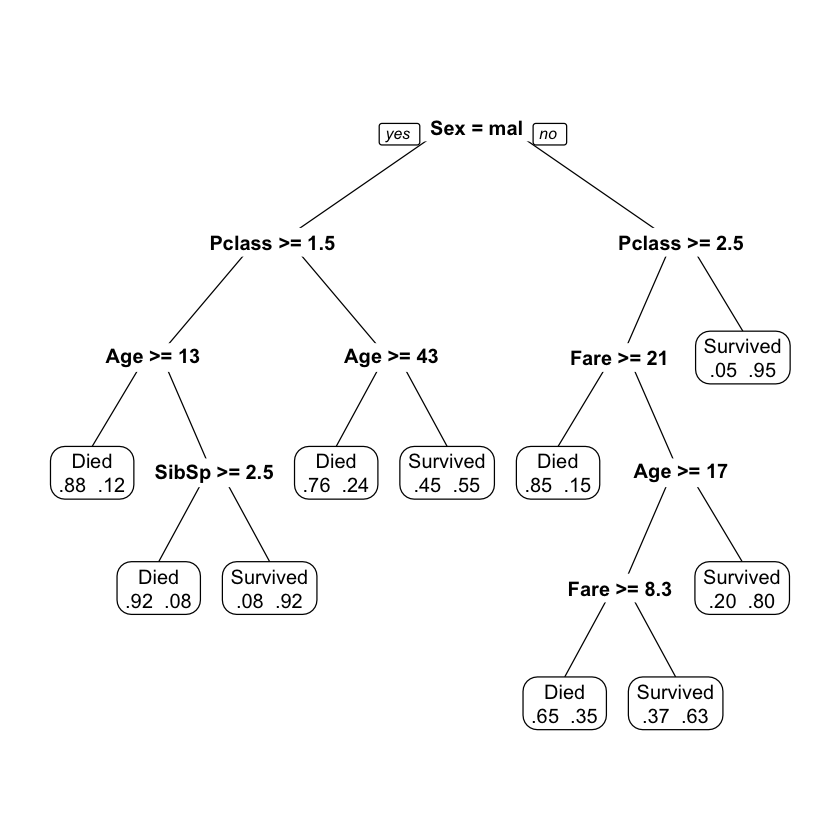

In [9]:
train$Survived <- factor(train$Survived, levels = c(0,1), labels = c("Died", "Survived"))
titanictree <- rpart::rpart(Survived ~ ., method="class", data = train[,-c(1,8,10)],
                            control = rpart::rpart.control(minsplit = 20, cp = .015))
rpart::printcp(titanictree)


##  <span style='color:royalblue'>  8. Get Decision Tree Accuracy </span>

In [10]:
prediction <- predict(titanictree, test, type = "vector") - 1
misClasificError <- mean(prediction != test$Survived)
print(1-misClasificError)

[1] 0.8245614
